In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
val_loss, train_loss = pd.read_csv('outputs/loss/val_loss.csv'), pd.read_csv('outputs/loss/train_loss.csv')
val_loss_hyp, train_loss_hyp = pd.read_csv('outputs/loss/val_loss_hyp.csv'), pd.read_csv('outputs/loss/train_loss_hyp.csv')
val_loss_rnd, train_loss_rnd = pd.read_csv('outputs/loss/val_loss_random.csv'), pd.read_csv('outputs/loss/train_loss_random.csv')
val_loss = val_loss.sort_values(by='Step').query('Step<=17600')
train_loss = train_loss.sort_values(by='Step').query('Step<=17600')

x_v, y_v, x_t, y_t = val_loss['Step'], val_loss['Value'], train_loss['Step'], train_loss['Value']
x_v_hyp, y_v_hyp, x_t_hyp, y_t_hyp = val_loss_hyp['Step'], val_loss_hyp['Value'], train_loss_hyp['Step'], train_loss_hyp['Value']
x_v_rnd, y_v_rnd, x_t_rnd, y_t_rnd = val_loss_rnd['Step'], val_loss_rnd['Value'], train_loss_rnd['Step'], train_loss_rnd['Value']

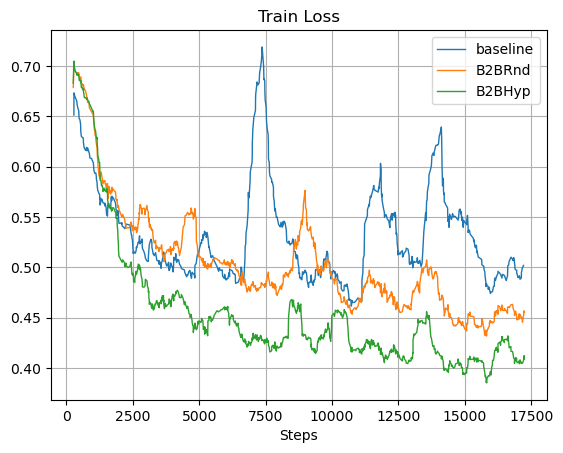

In [42]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

smt = 30
i = j = 14
lw=1

plt.plot(x_t[i:-j], smooth(y_t, smt)[i:-j], lw=lw)
plt.plot(x_t_hyp[i:-j], smooth(y_t_hyp, smt)[i:-j], lw=lw)
plt.plot(x_t_rnd[i:-j], smooth(y_t_rnd, smt)[i:-j], lw=lw)

plt.legend(['baseline', 'B2BRnd', 'B2BHyp'])
plt.grid()
plt.xlabel('Steps')
plt.title('Train Loss')
plt.show()

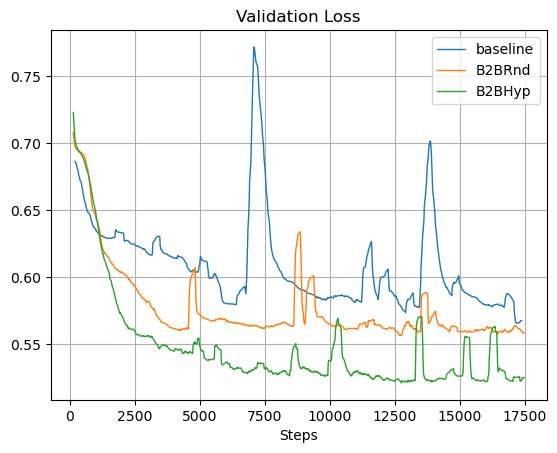

In [44]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

smt = 15
i = j = 7
lw=1

plt.plot(x_v[i:-j], smooth(y_v, smt)[i:-j], lw=lw)
plt.plot(x_v_hyp[i:-j], smooth(y_v_hyp, smt)[i:-j], lw=lw)
plt.plot(x_v_rnd[i:-j], smooth(y_v_rnd, smt)[i:-j], lw=lw)

plt.legend(['baseline', 'B2BRnd', 'B2BHyp'])
plt.grid()
plt.xlabel('Steps')
plt.title('Validation Loss')
plt.show()